# Cleaning Modes With Rational Filters

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as pl
import numpy as np
import qnm_filter
from gwpy.timeseries import TimeSeries
import copy

## Data

Download data

In [3]:
home_dir = "./MDC_waveforms/"

In [4]:
H_filename = "H-H1_NR_INJECTED-1126259448-16_TEOBResumS_GR_q_0.8_chi1_0.1_chi2_0.1_M72_dist452_incl1p59_ra1p68_decm1p27_psi3p93_flow7_nonoise_aligned.gwf"
L_filename = "L-L1_NR_INJECTED-1126259448-16_TEOBResumS_GR_q_0.8_chi1_0.1_chi2_0.1_M72_dist452_incl1p59_ra1p68_decm1p27_psi3p93_flow7_nonoise_aligned.gwf"

In [5]:
H_data = TimeSeries.read(home_dir + H_filename, 'H1:NR_INJECTED')
L_data = TimeSeries.read(home_dir + L_filename, 'L1:NR_INJECTED')

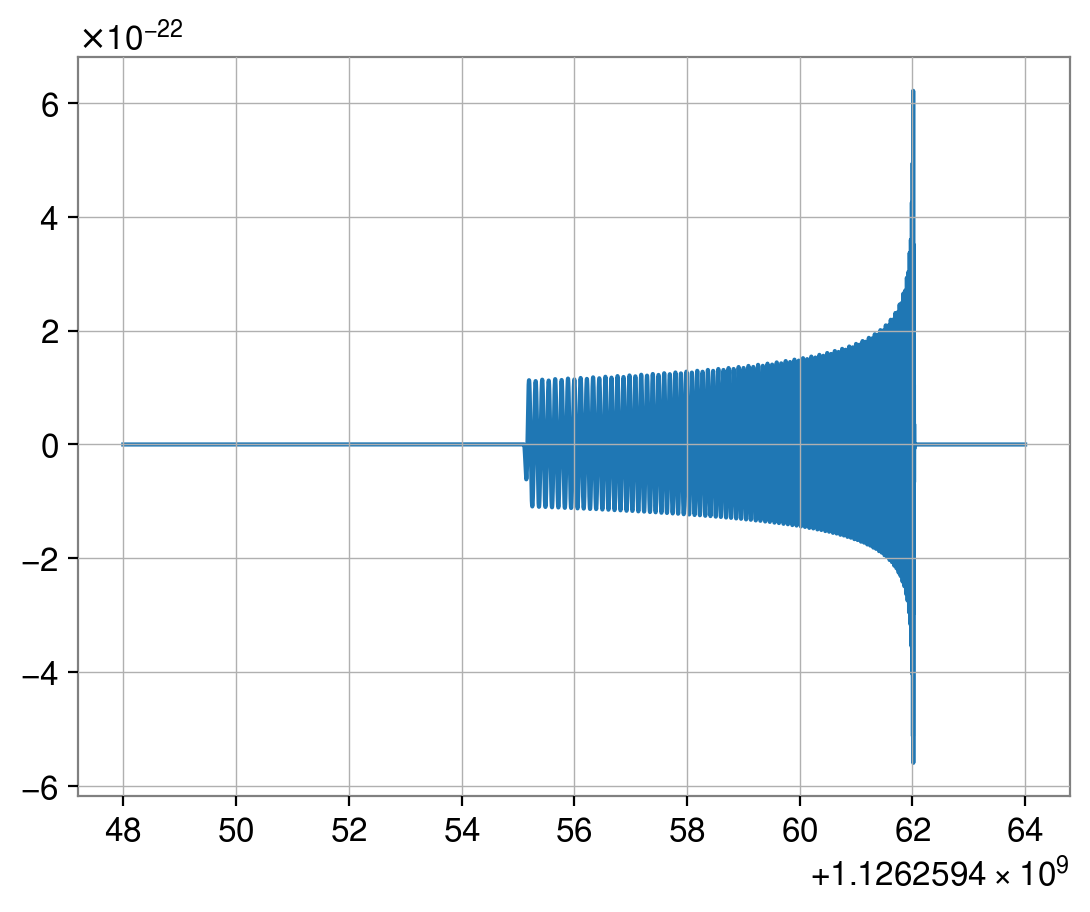

In [6]:
pl.plot(H_data)
# pl.plot(L_data)

In [7]:
H_waveform = qnm_filter.Data(H_data.value, index = H_data.times.value)
L_waveform = qnm_filter.Data(L_data.value, index = L_data.times.value)

In [8]:
peak_time = H_data.times.value[np.argmax(H_waveform)]
SSB_peak_time = peak_time - 0.014685396838313368

## Filter

In [9]:
input = dict(model_list = [(2, 2, 0)], #l, m, n
             # trucation time (geocenter, in second)
             t_init = SSB_peak_time+0e-3, #Calculated from SNR+t_init notebook
             # length of the analysis window (in second)
             window_width = 0.2,
             # sampling rate after conditioning (in Hz)
             srate = 2048,
             # sky localization
             ra = 1.95, dec = -1.27,
             # lower limit of the high-pass filter (in Hz)
             flow = 20)

fit = qnm_filter.Network(**input)

Load data

In [10]:
fit.original_data['H1'] = H_waveform

In [11]:
fit.detector_alignment()
fit.condition_data('original_data', **input, trim = 0.0)
fit.compute_acfs('original_data')

In [12]:
temp_acf = np.full(input['srate'], 0, dtype = np.double)
temp_acf[0] = 1e-22**2
fit.acfs['H1'] = qnm_filter.Data(temp_acf, index = fit.acfs['H1'].index)
fit.cholesky_decomposition()

In [13]:
fit.first_index()
template = fit.truncate_data(fit.original_data)['H1']

In [14]:
fit.compute_SNR(0, template, 'H1', optimal=True)

14.349463307121491

In [15]:
delta_mass = 1.0
delta_chi = 0.03
massspace = np.arange(34, 150, delta_mass)
chispace = np.arange(0.0, 0.99, delta_chi)
mass_grid, chi_grid = np.meshgrid(massspace, chispace)

In [16]:
flatten_array = [(i, j) for i in massspace for j in chispace]
saved_log_evidence = []

In [17]:
fit.first_index()
index_spacing = 2
num_iteration = 25
initial_offset = -20

In [18]:
t_array, saved_log_evidence, average_values, MAP_values = qnm_filter.evidence_parallel(fit, index_spacing, num_iteration, 
                                                           initial_offset, massspace, chispace, num_cpu = -1, 
                                                           verbosity=False, model_list = [(2, 2, 0)])

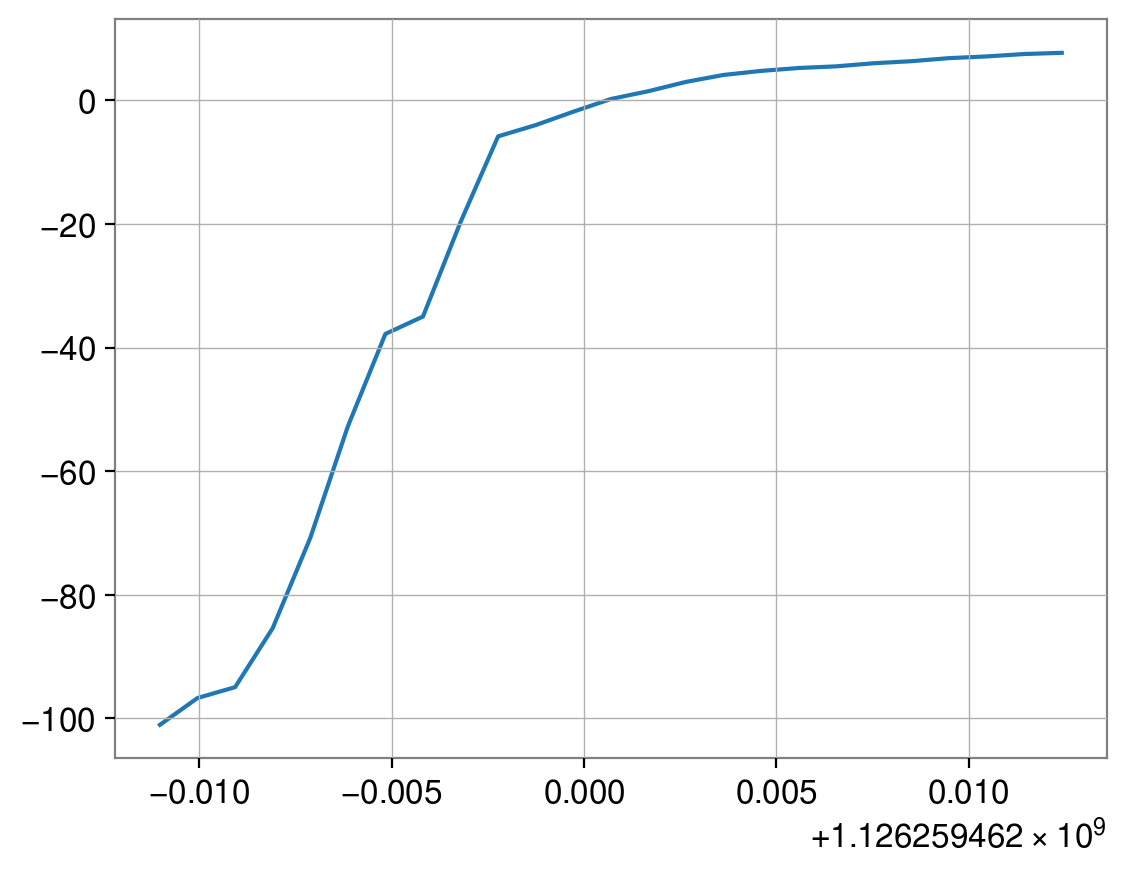

In [29]:
pl.plot(t_array, saved_log_evidence)

In [23]:
# Probability = e**likelihood = e**(e**ln likelihood)
# Normalise probability 
# Average = probability*mass / chi
# Distance = epsilon definition from paper
# Expand M and chi region - before running on cluster

In [24]:
220, 221, 222, 210, 440, 330

(220, 221, 222, 210, 440, 330)

In [25]:
import qnm
qnm.modes_cache(s=-2, l=2, m=2, n=0)(a=0.71)[0]

(0.5371215967617101-0.08040291793305679j)

In [26]:
qnm.modes_cache(s=-2, l=2, m=1, n=0)(a=0.71)[0]

(0.4573148056129102-0.08176615773254976j)